# To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup

In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
from bs4 import BeautifulSoup as bs
from scipy import stats
import sklearn

# Import data into Python environment

In [3]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [4]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [6]:
df.shape

(2224, 11)

In [7]:
df.isnull().sum()

,0
Ticket #,0
Customer Complaint,0
Date,0
Date_month_year,0
Time,0
Received Via,0
City,0
State,0
Zip code,0
Status,0


In [8]:
df.dtypes

,0
Ticket #,object
Customer Complaint,object
Date,object
Date_month_year,object
Time,object
Received Via,object
City,object
State,object
Zip code,int64
Status,object


# Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [9]:
df['Month']=pd.to_datetime(df['Date_month_year']).dt.month_name()
df['Date']=pd.to_datetime(df['Date_month_year']).dt.day

<ipython-input-9-61de2f9d78cf>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month']=pd.to_datetime(df['Date_month_year']).dt.month_name()
<ipython-input-9-61de2f9d78cf>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date_month_year']).dt.day


In [10]:
df.dtypes

,0
Ticket #,object
Customer Complaint,object
Date,int32
Date_month_year,object
Time,object
Received Via,object
City,object
State,object
Zip code,int64
Status,object


In [11]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,4,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August
2,242732,Speed and Service,18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July
4,307175,Comcast not working and no service to boot,26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,4,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,February
2220,318775,Comcast Monthly Billing for Returned Modem,6,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,February
2221,331188,complaint about comcast,6,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,September
2222,360489,Extremely unsatisfied Comcast customer,23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June


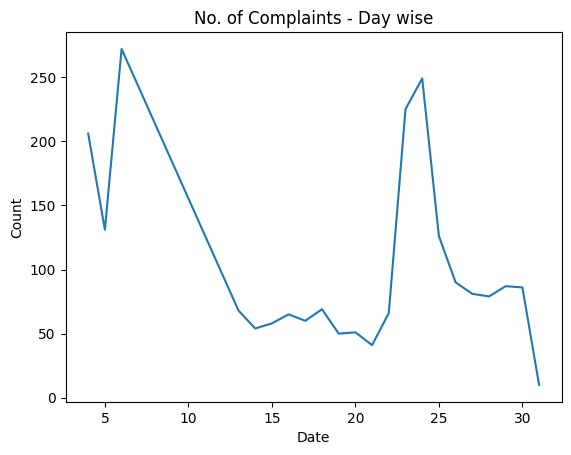

In [12]:
df.groupby(['Date'])['Customer Complaint'].count().plot()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('No. of Complaints - Day wise')
plt.show()

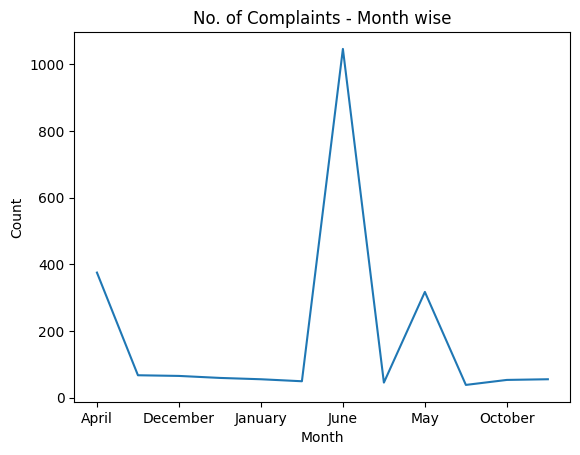

In [13]:
df.groupby(['Month'])['Customer Complaint'].count().plot()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('No. of Complaints - Month wise')
plt.show()

# Provide a table with the frequency of complaint types.    Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [14]:
df['Customer Complaint'].value_counts().to_frame().reset_index()

,Customer Complaint,count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Improper Billing and non resolution of issues,1
1837,Deceptive trade,1
1838,intermittent internet,1
1839,Internet Speed on Wireless Connection,1


# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [15]:
def func(x):
    if x=='Open':
        return 'Open'
    elif x=='Pending':
        return 'Open'
    else:
        return 'Closed'

In [16]:
df['Status Type']=df['Status'].apply(func)

In [17]:
df['Status Type'].to_frame()

,Status Type
0,Closed
1,Closed
2,Closed
3,Open
4,Closed
...,...
2219,Closed
2220,Closed
2221,Closed
2222,Closed


# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

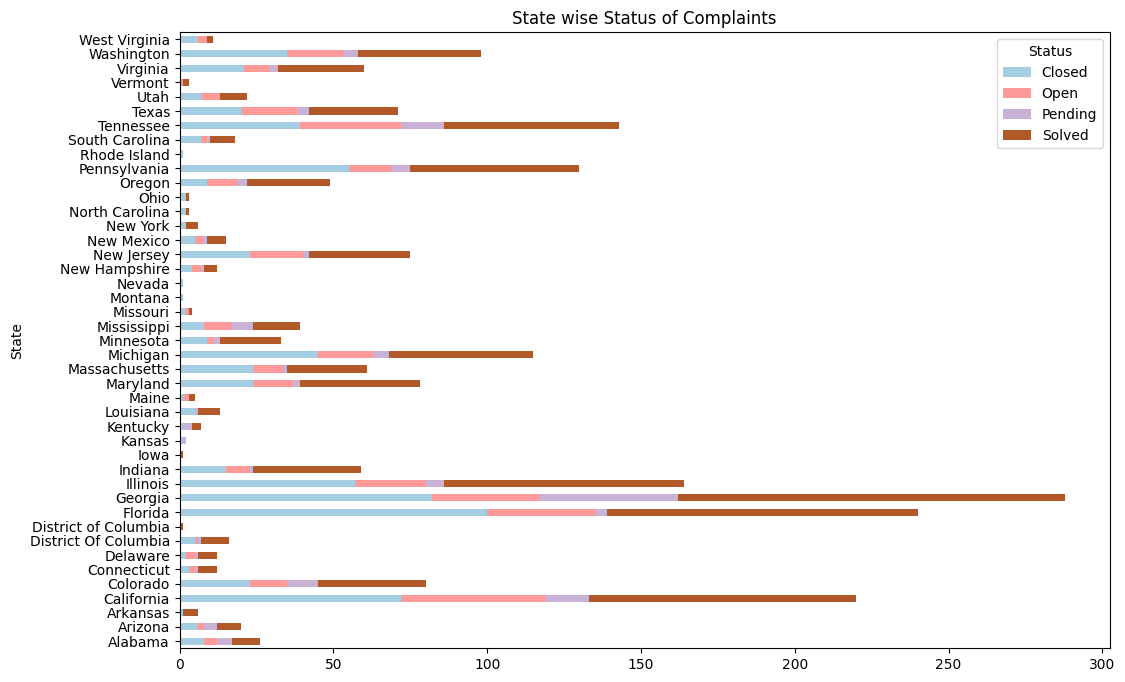

In [18]:
crosstab=pd.crosstab(index=df['State'],columns=df['Status'])
crosstab.plot(kind='barh',figsize=(12,8),stacked=True,colormap='Paired')
plt.title('State wise Status of Complaints')
plt.show()

# Which state has the maximum complaints

In [19]:
df.groupby('State')['Customer Complaint'].agg("count").sort_values(ascending=False).head(1)

,Customer Complaint
State,
Georgia,288


# Which state has the highest percentage of unresolved complaints

In [20]:
State_Unsolved = df.loc[df['Status']=='Open',['State']].value_counts()
State_Unsolved.head(1)/State_Unsolved.sum()*100

,count
State,
California,12.947658


# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [21]:
df[df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    52.724796
        Internet              47.275204
Name: proportion, dtype: float64